In [16]:
#dependencies
import psycopg2
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from config import password, db_name, user

In [2]:
from sqlalchemy import create_engine
# engine = create_engine('postgresql+psycopg2://localhost:5432/',database=db_name,user=user,password=password)
engine = create_engine(
    f"postgresql+psycopg2://{user}:{password}@/{db_name}?localhost:5432"
)
conn = engine.connect()

In [3]:
# read the data records from the tables
salary_data = pd.read_sql(
                "select e.emp_no, \
                  first_name, \
                  last_name, \
                  salary, \
                  title, \
                  dept_name \
                from employees e join dept_emp de on e.emp_no = de.emp_no \
                  join departments d on d.dept_no = de.dept_no \
                  join salaries s on s.emp_no = e.emp_no \
                  join titles t on t.title_id = e.emp_title_id",
                conn)
# we want to know the salary ranges for employees and titles

In [4]:
salary_data.head()

,emp_no,first_name,last_name,salary,title,dept_name
0,10005,Kyoichi,Maliniak,78228.0,Staff,Human Resources
1,10010,Duangkaew,Piveteau,72488.0,Engineer,Production
2,10010,Duangkaew,Piveteau,72488.0,Engineer,Quality Management
3,10011,Mary,Sluis,42365.0,Staff,Customer Service
4,10035,Alain,Chappelet,41538.0,Senior Engineer,Production


In [5]:
# get a summary of the salaries
salary_data['salary'].describe()

count    331603.000000
mean      52972.225432
std       14299.003001
min       40000.000000
25%       40000.000000
50%       48691.000000
75%       61765.000000
max      129492.000000
Name: salary, dtype: float64

In [6]:
salaries = salary_data['salary']
salaries

0         78228.0
1         72488.0
2         72488.0
3         42365.0
4         41538.0
           ...   
331598    40000.0
331599    41002.0
331600    40000.0
331601    52282.0
331602    40000.0
Name: salary, Length: 331603, dtype: float64

Text(0.5, 0, 'Salary')

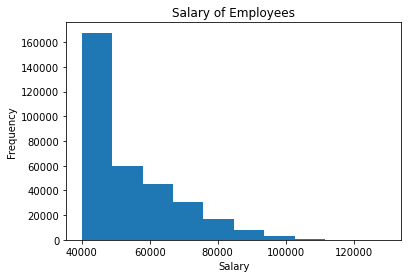

In [23]:
# create the salary histogram to show common ranges
salary_histogram = salaries.plot.hist(bins = 10, title = "Salary of Employees")
salary_histogram.set_xlabel("Salary")

In [24]:
# save the salary histogram to a png
salaryRange_fig = salary_histogram.get_figure()
salaryRange_fig.savefig("Salary-Histogram.png")

In [50]:
avgSalary_title = pd.DataFrame(salary_data.groupby('title')['salary'].mean())
avgSalary_title = avgSalary_title.sort_values('salary',ascending=False)
avgSalary_title

,salary
title,
Senior Staff,58557.394072
Staff,58460.049489
Manager,51531.041667
Assistant Engineer,48615.074794
Technique Leader,48574.320997
Engineer,48533.339845
Senior Engineer,48505.714313


Text(0, 0.5, 'Average Salary')

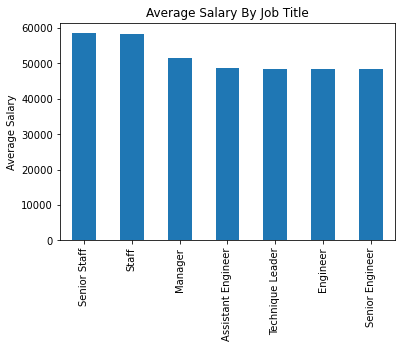

In [51]:
# create the bar chart for avg salary by title
salary_barChart = avgSalary_title.plot.bar(title = 'Average Salary By Job Title',legend=False)
salary_barChart.set_xlabel("")
salary_barChart.set_ylabel("Average Salary")

In [52]:
# save the salary histogram to a png
salaryTitleAvg_fig = salary_barChart.get_figure()
salaryTitleAvg_fig.savefig("Avg-Salary-Title.png")